IndexError: index 4 is out of bounds for axis 0 with size 4

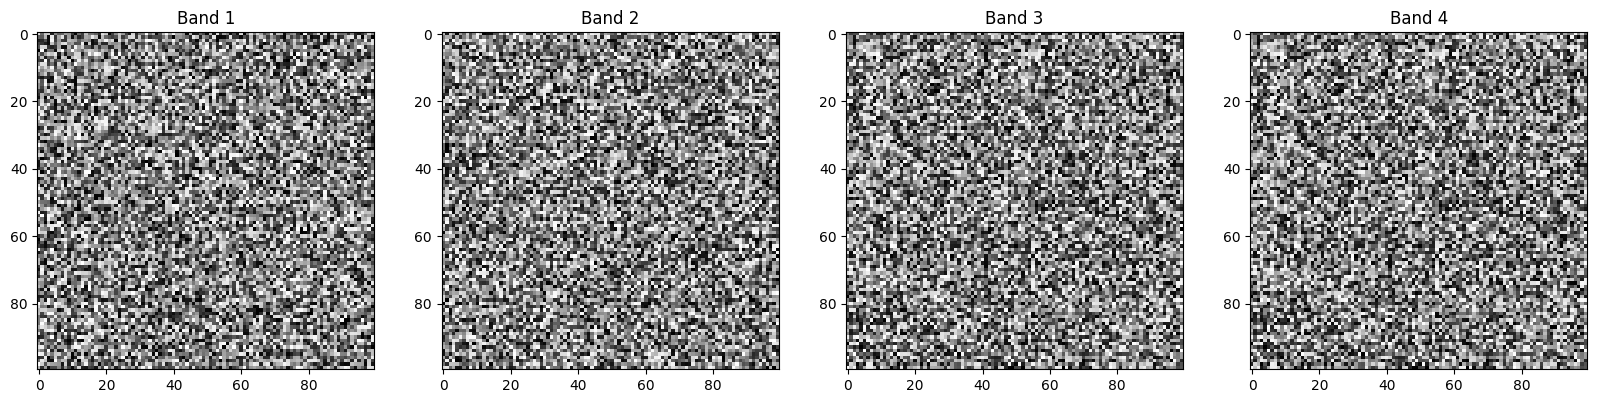

In [1]:
#Installing packages and libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

#Function for loading image bands (replace with actual data)
def load_bands():
    #Dummy data for demonstration
    band1 = np.random.rand(100, 100)  #Example Band 1 (visible)
    band2 = np.random.rand(100, 100)  #Example Band 2 (near-infrared)
    band3 = np.random.rand(100, 100)  #Example Band 3 (thermal)
    band4 = np.random.rand(100, 100)  #Example Band 4 
    return band1, band2, band3, band4

#Function for computing NDSI (used to identify any snow covered areas)
def compute_ndsi(band1, band2):
    return (band1 - band2)/(band1 + band2)

#Function for computing brightness
def compute_brightness(band1, band2, band3, band4):
    return (band1 + band2 + band3 + band4)/3

#Main function to create cloud mask
def create_cloud_mask(band1, band2, band3, band4):
    ndsi = compute_ndsi(band1, band2)
    brightness = compute_brightness(band1, band2, band3, band4)
    thermal_threshold = band3 > 0.5  #Example threshold

    cloud_mask = (ndsi > 0.3) & (brightness > 0.5) & thermal_threshold  #Combine indices
    return cloud_mask

#Visualising results
def visualize_results(band1, band2, band3, band4, cloud_mask):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    axes[0].imshow(band1, cmap='gray')
    axes[0].set_title('Band 1')
    axes[1].imshow(band2, cmap='gray')
    axes[1].set_title('Band 2')
    axes[2].imshow(band3, cmap='gray')
    axes[2].set_title('Band 3')
    axes[3].imshow(band3, cmap='gray')
    axes[3].set_title('Band 4')
    axes[4].imshow(cloud_mask, cmap='gray')
    axes[4].set_title('Cloud Mask')
    plt.show()

#Loading image bands and creating cloud mask, then visualising results
band1, band2, band3, band4 = load_bands()
cloud_mask = create_cloud_mask(band1, band2, band3, band4)
visualize_results(band1, band2, band3, band4, cloud_mask)
